# **Image Segmentation**

이미지 분할(image segmentation)은 아래 그림의 예들이 보여주듯이 이미지를 서로 다른 세그먼트(segment)들 혹은 영역(region)들로 분할하는 것이다. 

* 첫 번째 예는 이미지를 "고양이"와 "배경"이라는 2개의 세그먼트로 분할한 것이다. 이미지에서 주 피사체를 배경과 분리하는 것은 이미지 분할의 가장 간단한 사례라고 할 수 있다.
* 두 번째 예는 이미지 분할 문제의 대표적인 응용 사례이며, 거리 이미지를 "도로", "사람", "자동차", "건물", "가로수" 등 거리에서 볼 수 있는 대표적인 대상들로 분할한 것이다. 
* 이미지 분할의 가장 중요한 응용 분야는 의료 이미지 분석이다. 세 번째 예에서는 의료 이미지를 
주 관심 대상인 어떤 특정 조직(예: 암조직, 혈관, 등)과 나머지 부분으로 분할한 것이다. 
* 마지막 예는 인공위성 혹은 항공 사진을 "도로", "건물" 등으로 분할한 사례이다.

이미지 분할에서 이미지 세그먼트들은 색상의 동일성과 같은 순수한 이미지적인 특성에 따라 분할되는 것이 아니라 "동일한 의미를 가지는 혹은 동일한 대상에 속한 부분들"로 분할한다는 의미에서 **semantic segmentation**이라고 부르기도 한다.

<img src="https://raw.githubusercontent.com/ohheum/DS2022/ba445e169e88f8d1496d6e136521cbe61cc95e55/assets/1*Swzo18J0T70FxFgFklOtjQ.jpeg" width="600" height="250">

<img src="https://raw.githubusercontent.com/ohheum/DS2022/b165b933470b1d48089eabe46618170b5e565311/assets/4-Figure3-1.png" width="600" height="300">

<img src="https://raw.githubusercontent.com/ohheum/DS2022/d6032083aa54eaff4b709d9f317bb4c5946e2530/assets/Different-applications-of-medical-image-segmentation_W640.jpg" width="600" height="300">

<img src="https://raw.githubusercontent.com/ohheum/DS2022/7e9d326785184750d6f0a86da4ab06ae94ad048f/assets/4-Figure1-1.png" width="600" height="300">

이미지 분할에서는 이미지를 어떤 세그먼트들로 분할할 것인지가 미리 정해져야 한다. 그런 의미에서 이미지 분할 문제는 결국 이미지를 구성하는 **각각의 픽셀을 고정된 개수의 클래스(class)들로 분류(classification)하는 문제**이다.

각 픽셀들을 `num_classes`개의 클래스로 분류하는 경우에 

* 입력 이미지의 shape은 `(C, H, W)`이고(C는 채널수),
* 라벨의 shape은 원-핫 인코딩을 하지 않았다고 가정할 때 `(1, H, W)`이며, 0에서 `num_classes-1` 사이의 정수들로 구성되고,
* 네트워크 출력의 shape은 `(num_classes, H, W)`이다. 


<img src="https://raw.githubusercontent.com/ohheum/DS2022/e5d364271ab4c8cfd6635b58926c61ab86173084/assets/semantic_seg.png" width="600" height="760">


# UNet 구조

UNet은 2015년에 Olaf Ronneberger등에 의해서 고안된 네트워크 구조이다. 처음의 목적은 폐와 뇌에서 종양을 찾기위한 의료 이미지 분석이었으며 이후 여러 분야에서 활용되고 있다. Unet의 구조는 다음 그림과 같다.

<img src="https://raw.githubusercontent.com/ohheum/DS2022/1589964052894d2d3eeff85c7277c418f7a423f8/assets/1*lvXoKMHoPJMKpKK7keZMEA.png" width="600" height="380">

Unet의 구조는 'U'자 모양을 하고 있으며, **수축(contraction)**, **병목(bottleneck)** 및 **확장(expansion)** 섹션의 세 섹션으로 구성된다. 

* 수축 섹션은 수축 블록들(contraction blocks)로 구성된다. 각 수축 블록은 2개의 3X3 컨볼루션 레이어와 2X2 최대 풀링으로 구성된다. 수축 섹션을 거치는 동안 특성 맵(feature map)의 채널 수는 `3->64->128->256->512`로 2배씩 늘어나며, 가로-세로 크기는 하나의 블록을 지날 때 마다 대략 절반으로 줄어든다. 이런 의미에서 이 과정을 **다운 샘플링(down sampling)** 과정이라고 부르기도 한다(줄어드는 이미지의 정확한 크기는 입력 이미지의 크기와 컨볼루션-맥스 풀링 층의 정확한 설정에 따라 달라질 수 있다.)

* Example of trained kernels(feature extractors)

![Pictorial-representation-of-features-in-3-layers-of-a-CNN-34-Notice-the-increasing.png](https://www.researchgate.net/publication/308883811/figure/fig2/AS:413666332692485@1475637148009/Pictorial-representation-of-features-in-3-layers-of-a-CNN-34-Notice-the-increasing.png)

* 그림에서 가장 아래에 표시된 층은 병목 층은 수축층과 팽창층 사이를 중재한다. 2개의 3X3 CNN 레이어와 2X2 **상향 컨볼루션 레이어**를 사용한다. 

* 상향 컨볼루션 레이어는 `nn.ConvTranspose2d` 레이어로 구현되는데 채널의 개수는 절반으로 줄이고, 대신 가로-세로 크기는 대략 2배로 늘린다. 그런 의미에서 **업 샘플링(up sampling)**이라고 불린다.

* 확장 섹션은 수축 섹션과 유사하게 여러 개의 확장 블록으로 구성된다. 각 확장 블록은 2개의 3X3 CNN 레이어와 2X2 상향 컨볼루션 레이어로 구성된다. 또한 **특성 맵의 채널 수와 크기는 수축 섹션과의 대칭을 유지**한다. 

* **각각의 확장 블록의 입력에는 대응하는 축소 레이어의 기능 맵(feature map) 즉 출력이 추가(append)된다**. 이것을 통해 이미지를 축소하는 동안 학습된 내용이 이미지를 재구성하는데 사용된다. (ResNet 아이디어 착안)

* 마지막으로 매핑은 원하는 세그먼트 수와 동일한 특성 맵 수를 가진 또 다른 3X3 CNN 레이어가 적용된다.

## `nn.ConvTranspose2d`층을 통한 업 샘플링

CNN에서는 일반적으로 컨볼루션 레이어나 풀링 레이어에서 2이상의 stride를 사용하여 이미지(특성 맵)의 크기를 줄인다. 이것을 다운-샘플링(down sampling)이라고 부른다. 반대로 이미지의 크기를 키워 나가는 일을 업-샘플링(up sampling)이라고 부른다. 몇몇 서로 다른 업-샘플링 방법들이 사용되고 있지만 `Unet`에서는  Transposed Convolution 연산을 통해서 업-샘플링을 수행한다.  

아래의 그림은 2\*2 크기의 입력에 대해서 2\*2 크기의 커널을 사용한 transposed convolution 연산의 예를 보여준다. stride=1인 경우이다. 각 픽셀의 값이 2\*2 크기의 필터(커널)에 곱해지고, 그 결과들이 중첩된 형태로 더해져서 출력을 구성한다.

<img src="https://raw.githubusercontent.com/ohheum/DS2022/a05bc0539a87987e0ae8522969c69c9b447409a5/assets/convtransposed01.png" width="600" height="280">

다음의 그림은 `stride=2`인 경우이다. 커널 크기와 stride가 2로 동일하여 결과들이 중첩되지 않고 이어붙여지는 형태가 되었다.

<img src="https://raw.githubusercontent.com/ohheum/DS2022/5c3e3c19d8eb2a538e2ead68775b15cab45873c2/assets/convtransposed02.png" width="600" height="360">



아래의 그림은 3\*3 커널을 사용하고, stride=2, padding=1인 경우이다. `padding=1`은 convolution연산과는 반대로 결과에서 1줄을 제거하는 역할을 한다.

<img src="https://raw.githubusercontent.com/ohheum/DS2022/fd645ebaab09d0febb601ea2c87fb93d2211d8bd/assets/convtransposed03.png" width="600" height="360">

## Setup

In [ ]:
%matplotlib inline

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
# This section is for x86
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device)
print(device)

cuda:0


## **데이터 셋**

[Pascal VOC2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/) 데이터셋을 사용한다. 먼저 [여기](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar)에서 데이터셋을 다운로드하여 압축을 푼다. 압축을 해제하면 데이터가 다음과 같은 디렉토리 구조로  저장되어 있다

```
  VOC2012
  |-- Annotations
  |-- ImageSets
      |-- Action
      |-- Layout
      |-- Main
      |-- Segmentatioin
          |-- train.txt
          |-- tranval.txt
          |-- val.txt
  |-- JPEGImages
  |-- SegmentationClass
  |-- SegmentationObject
```


이 중에서 semantic segmentation을 위해서 사용할 데이터는 다음과 같다.

* `JPEGimages` 디렉토리: 이미지 파일들이 저장되어 있다.
* `SegmentationClass` 디렉토리: 라벨들이 저장되어 있다.
* `ImageSets/Segmentation` 디렉토리: Semantic segmentation에 사용될 이미지 파일명의 목록이 `train.txt`, `trainval.txt`, 그리고 `val.txt` 세 파일에 저장되어 있다.

Colab을 사용할 경우 다운로드한 데이터를 구글 드라이브에 저장하고 구글 드라이브를 마운트한다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


다운로드한 데이터셋의 최상위 디렉토리의 경로명을 지정한다.

In [ ]:
# data_dir = '../datasets/VOC2012'
data_dir = '/content/drive/MyDrive/DeepLearning2022/datasets/VOC2012'

아래의 함수 `read_voc_images`는 사용할 모든 이미지와 라벨들을 메모리로 읽어 온다.
(이렇게 미리 모든 이미지들을 메모리로 읽어오는 것은 데이터가 많을 경우 바람직하지 않을 수 있다.)

In [ ]:
def read_voc_images(voc_dir, is_train=True):
    """Read all VOC feature and label images."""
    txt_fname = os.path.join(voc_dir, 'ImageSets', 'Segmentation',
                             'train.txt' if is_train else 'val.txt')
    mode = torchvision.io.image.ImageReadMode.RGB
    with open(txt_fname, 'r') as f:
        images = f.read().split()
    features, labels = [], []
    for i, fname in enumerate(images):
        features.append(torchvision.io.read_image(os.path.join(
            voc_dir, 'JPEGImages', f'{fname}.jpg')))
        labels.append(torchvision.io.read_image(os.path.join(
            voc_dir, 'SegmentationClass', f'{fname}.png'), mode))
    return features, labels

train_features, train_labels = read_voc_images(data_dir, True)

5개의 이미지와 대응하는 라벨을 화면에 디스플레이해보자. 라벨에서 검은색과 흰색 픽셀들은 각각 배경과 세크먼트 간의 경계를 표현한다는 것을 알 수 있다.

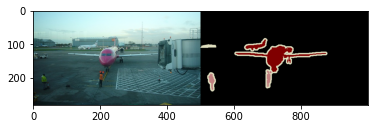

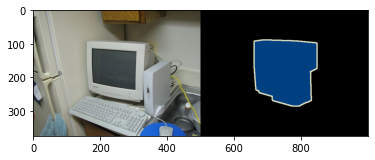

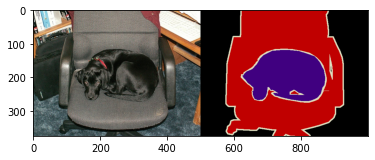

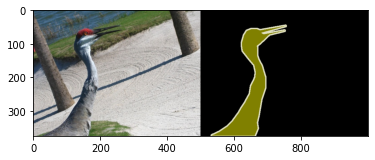

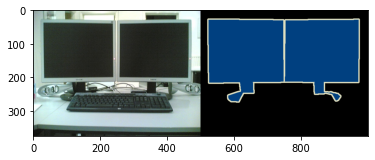

In [ ]:
for i in range(5):
  merged = torch.cat([train_features[i], train_labels[i]], dim=2)
  merged = merged.numpy().transpose((1, 2, 0))
  plt.imshow(merged)
  plt.show()

우리가 분류할 클래스는 21가지이다. 아래에서 `VOC_CLASSES`와 `VOC_COLORMAP`는 각 클래스의 '명칭'과 라벨에서 각 클래스가 어떤 픽셀값으로 표현되어 있는지를 보여준다.

In [ ]:
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]


VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

num_classes = len(VOC_CLASSES)

데이터셋에서 라벨이 `VOC_COLORMAP`에 속한 색상들로 표현되어 있는 이유는 라벨과 분할의 결과물을 시각화하기 위한 것이다. 실제로 네트워크에서 사용하기 위해서는 먼저 이 색상들이 0\~20 사이의 정수로 변환되어야 할 것이다. 아래의 함수 `voc_label_indices`는 `(3, H, W)` 크기의 라벨은 `(H, W)` 크기의 0~20 사이의 정수로 구성된 텐서로 변환해준다. 세그먼트들의 경계를 표현하는 흰색과 같이 `VOC_COLORMAP`에 없는 색상들은 이 변환과정에서 배경을 의미하는 0으로 표현된다.

In [ ]:
def voc_colormap2label():
    """Build the mapping from RGB to class indices for VOC labels."""
    colormap2label = torch.zeros(256 ** 3, dtype=torch.long)
    for i, colormap in enumerate(VOC_COLORMAP):
        colormap2label[(colormap[0] * 256 + colormap[1]) * 256 + colormap[2]] = i
    return colormap2label

def voc_label_indices(colormap, colormap2label):
    """Map any RGB values in VOC labels to their class indices."""
    colormap = colormap.permute(1, 2, 0).numpy().astype('int32')
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256 + colormap[:, :, 2])
    return colormap2label[idx]   # integer array indexing in Numpy

트레이닝셋의 첫 번째 이미지의 변환결과의 일부를 살펴보면 배경은 0, 비행기는 1로 표현되었음을 확인할 수 있다.

In [ ]:
color_index = voc_colormap2label()
y = voc_label_indices(train_labels[0], color_index)
y[105:115, 130:140], VOC_CLASSES[1]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]), 'aeroplane')

### 데이터 전처리

위의 5개의 이미지의 예에서 보듯이 이미지들의 크기는 균일하지 않다. 일반적인 이미지 분류(classification) 문제에서는 단지 이미지들은 resizing하여 동일한 크기로 만들어 주면 되지만, 이 경우에는 라벨 역시 이미지와 동일한 크기여야 하므로 그렇게 할 수는 없다. 일반적으로 이미지의 resizing은 interploation 기법을 이용하여 이루어지므로 라벨에 적용할 경우 허용된 21 종류의 색상 이외의 색상이 도입될 수 있고, 결과적으로 라벨의 정확성을 훼손하게 될 것이다.

이 문제를 해결하는 방법은 여러가지가 있을 수 있다. 여기에서는 이미지를 rescaling하는 대신 이미지에서 고정된 크기의 일부분을 crop하여 사용한다. 물론 이때 라벨에서도 동일한 부분을 crop하여 사용한다. 

함수 `voc_rand_crop`은 이미지와 라벨에서 지정된 크기의 랜덤 크롭을 수행한다.

In [ ]:
def voc_rand_crop(feature, label, height, width):
    """Randomly crop both feature and label images."""
    rect = torchvision.transforms.RandomCrop.get_params(
        feature, (height, width))
    feature = torchvision.transforms.functional.crop(feature, *rect)
    label = torchvision.transforms.functional.crop(label, *rect)
    return feature, label

트레이닝 데이터셋의 첫 번째 이미지와 라벨에 대해서 200\*300 크기로 5번 랜덤 크롭을 한 결과를 살펴보자.

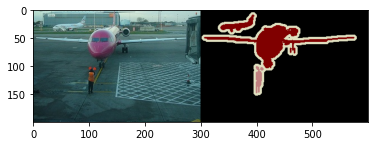

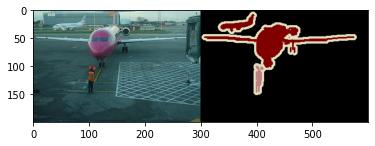

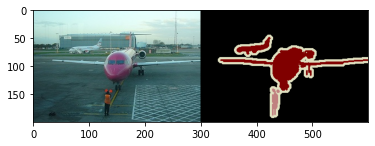

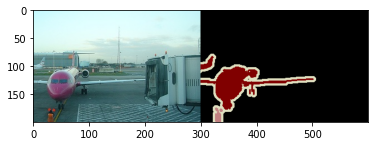

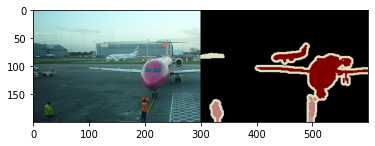

In [ ]:
for i in range(5):
  img, lab = voc_rand_crop(train_features[0], train_labels[0], 200, 300)
  merged = torch.cat([img, lab], dim=2).numpy().transpose((1, 2, 0))
  plt.imshow(merged)
  plt.show()

### **`VOCSegDataset` 클랫스**

이제 커스텀 데이터셋 클래스 `VOCSegDataset`를 정의한다. 몇몇 이미지들은 원하는 크기보다 작아서 랜덤 크롭을 할 수 없다. 그런 이미지들은 `get_voc_images_path` 함수에서 제외하였다.

메모리 용량을 고려하여 모든 이미지와 라벨들을 한 번에 로드하는 대신 이미지와 라벨의 경로만을 저장하고, `__getitem__` 함수에서 필요시에만 실제로 이미지와 라벨을 로드하도록 하였다.

In [ ]:
class VOCSegDataset(torch.utils.data.Dataset):
    """A customized dataset to load the VOC dataset."""

    def __init__(self, is_train, crop_size, voc_dir):
        self.transform = torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.crop_size = crop_size
        self.feature_paths, self.label_paths = self.get_voc_images_path(voc_dir, crop_size, is_train=is_train)
        self.colormap2label = voc_colormap2label()
        print('read ' + str(len(self.feature_paths)) + ' examples')

    def get_voc_images_path(self, voc_dir, crop_size, is_train):
        """Read all VOC feature and label images."""
        txt_fname = os.path.join(voc_dir, 'ImageSets', 'Segmentation',
                                'train.txt' if is_train else 'val.txt')
        mode = torchvision.io.image.ImageReadMode.RGB
        with open(txt_fname, 'r') as f:
            images = f.read().split()

        feature_paths, label_paths = [], []
        for i, fname in enumerate(images):
            im_path = os.path.join(voc_dir, 'JPEGImages', f'{fname}.jpg')
            label_path = os.path.join(voc_dir, 'SegmentationClass', f'{fname}.png')
            im = Image.open(im_path)
            width, height = im.size
            if height >= crop_size[0] and width >= crop_size[1]:
              feature_paths.append(im_path)
              label_paths.append(label_path)

        return feature_paths, label_paths

    def normalize_image(self, img):
        return self.transform(img.float() / 255)

    def __getitem__(self, idx):
        mode = torchvision.io.image.ImageReadMode.RGB
        feature = torchvision.io.read_image(self.feature_paths[idx])
        label = torchvision.io.read_image(self.label_paths[idx], mode)

        feature, label = voc_rand_crop(feature, label, *self.crop_size)
        feature = self.normalize_image(feature)

        label = voc_label_indices(label, self.colormap2label)

        return feature, label

    def __len__(self):
        return len(self.feature_paths)

### **`DataSet`과 `DataLoader` 생성하기**

크롭 사이즈를 $320\times 480$로 지정하고 데이터셋과 데이터로더를 생성한다. 배치 사이즈는 8로 하였다. 


In [ ]:
crop_size = (320, 480)
voc_train = VOCSegDataset(True, crop_size, data_dir)
voc_test = VOCSegDataset(False, crop_size, data_dir)

read 1114 examples
read 1078 examples


In [ ]:
batch_size = 8
train_iter = torch.utils.data.DataLoader(voc_train, batch_size, shuffle=True, num_workers=2,
                                    drop_last=True)

test_iter = torch.utils.data.DataLoader(voc_test, batch_size, shuffle=False, num_workers=2,
                                    drop_last=True)

# Just for test
for X, Y in train_iter:
    print(X.shape)
    print(Y.shape)
    break

torch.Size([8, 3, 320, 480])
torch.Size([8, 320, 480])


## **`Unet` Model**

<img src="https://raw.githubusercontent.com/ohheum/DS2022/1589964052894d2d3eeff85c7277c418f7a423f8/assets/1*lvXoKMHoPJMKpKK7keZMEA.png" width="600" height="380">

**주의:** 아래의 `Unet` 구현에서는 모든 컨볼루션 레이어에서 `kernel_size=3`, `stride=2`, `padding=1`을 적용하여 이미지(특성 맵)의 크기가 동일하게 유지되도록 하였다. 이런 면에서 원래의 `Unet`(위의 그림)과 약간 다르다. 다운 샘플링과 업 샘플링은 `MaxPool2d` 레이어와 `ConvTransposed2d` 레이어에서 이루어진다.

In [ ]:
class UNet(nn.Module):
    
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.num_classes = num_classes
        self.contracting_11 = self.conv_block(in_channels=3, out_channels=64)
        self.contracting_12 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_21 = self.conv_block(in_channels=64, out_channels=128)
        self.contracting_22 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_31 = self.conv_block(in_channels=128, out_channels=256)
        self.contracting_32 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.contracting_41 = self.conv_block(in_channels=256, out_channels=512)
        self.contracting_42 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.middle = self.conv_block(in_channels=512, out_channels=1024)
        self.expansive_11 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_12 = self.conv_block(in_channels=1024, out_channels=512)
        self.expansive_21 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_22 = self.conv_block(in_channels=512, out_channels=256)
        self.expansive_31 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_32 = self.conv_block(in_channels=256, out_channels=128)
        self.expansive_41 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.expansive_42 = self.conv_block(in_channels=128, out_channels=64)
        self.output = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=3, stride=1, padding=1)
        
    def conv_block(self, in_channels, out_channels):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels),
                                    nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels))
        return block
    
    def forward(self, X):
        contracting_11_out = self.contracting_11(X) # [-1, 64, 320, 480]
        contracting_12_out = self.contracting_12(contracting_11_out) # [-1, 64, 160, 240]
        contracting_21_out = self.contracting_21(contracting_12_out) # [-1, 128, 160, 240]
        contracting_22_out = self.contracting_22(contracting_21_out) # [-1, 128, 80, 120]
        contracting_31_out = self.contracting_31(contracting_22_out) # [-1, 256, 80, 120]
        contracting_32_out = self.contracting_32(contracting_31_out) # [-1, 256, 40, 60]
        contracting_41_out = self.contracting_41(contracting_32_out) # [-1, 512, 40, 60]
        contracting_42_out = self.contracting_42(contracting_41_out) # [-1, 512, 20, 30]
        middle_out = self.middle(contracting_42_out) # [-1, 1024, 20, 30]
        expansive_11_out = self.expansive_11(middle_out) # [-1, 512, 40, 60]
        expansive_12_out = self.expansive_12(torch.cat((expansive_11_out, contracting_41_out), dim=1)) # [-1, 1024, 40, 60]
        expansive_21_out = self.expansive_21(expansive_12_out) # [-1, 256, 80, 120]
        expansive_22_out = self.expansive_22(torch.cat((expansive_21_out, contracting_31_out), dim=1)) # [-1, 512, 80, 120]
        expansive_31_out = self.expansive_31(expansive_22_out) # [-1, 128, 160, 240]
        expansive_32_out = self.expansive_32(torch.cat((expansive_31_out, contracting_21_out), dim=1)) # [-1, 256, 160, 240]
        expansive_41_out = self.expansive_41(expansive_32_out) # [-1, 64, 320, 480]
        expansive_42_out = self.expansive_42(torch.cat((expansive_41_out, contracting_11_out), dim=1)) # [-1, 128, 320, 480]
        output_out = self.output(expansive_42_out) # [-1, num_classes, 320, 480]
        return output_out

이제 `Unet` 모델을 생성한다.

In [ ]:
model = UNet(num_classes=num_classes)

In [ ]:
from torchsummary import summary
print(summary(model, (3, 320, 480)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 320, 480]           1,792
              ReLU-2         [-1, 64, 320, 480]               0
       BatchNorm2d-3         [-1, 64, 320, 480]             128
            Conv2d-4         [-1, 64, 320, 480]          36,928
              ReLU-5         [-1, 64, 320, 480]               0
       BatchNorm2d-6         [-1, 64, 320, 480]             128
         MaxPool2d-7         [-1, 64, 160, 240]               0
            Conv2d-8        [-1, 128, 160, 240]          73,856
              ReLU-9        [-1, 128, 160, 240]               0
      BatchNorm2d-10        [-1, 128, 160, 240]             256
           Conv2d-11        [-1, 128, 160, 240]         147,584
             ReLU-12        [-1, 128, 160, 240]               0
      BatchNorm2d-13        [-1, 128, 160, 240]             256
        MaxPool2d-14         [-1, 128, 

## **트레이닝**

In [ ]:
epochs = 20
lr = 0.01

In [ ]:
model = model.to(device)

일종의 분류문제이므로 손실함수로는 지금까지와 마찬가지로 `CrossEntropyLoss`를 사용한다. 지금까지 사용한 SGD 옵티마이저 대신에 Adam 옵티마이저를 사용한다. Adam 옵티마이저는 패러매터마다 서로 다른 학습률(learning rate)을 적용하는 일종의 적응적(adaptive) 학습 알고리즘이다. 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
import gc

step_losses = []
epoch_losses = []
for epoch in range(epochs):
    print('Epoch {} started'.format(epoch))
    epoch_loss = 0

    for n, (X, Y) in enumerate(train_iter):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()
        Y_pred = model(X)
        loss = criterion(Y_pred, Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        step_losses.append(loss.item())

        del X, Y, Y_pred
        torch.cuda.empty_cache()
        gc.collect()

        if (n + 1) % 20 == 0:
          print('*', end='')

    epoch_losses.append(epoch_loss/len(train_iter))
    print()

Epoch 0 started


트레이닝 과정에서 기록해둔 `step_losses`와 `epoch_losses`를 차트로 그려본다.

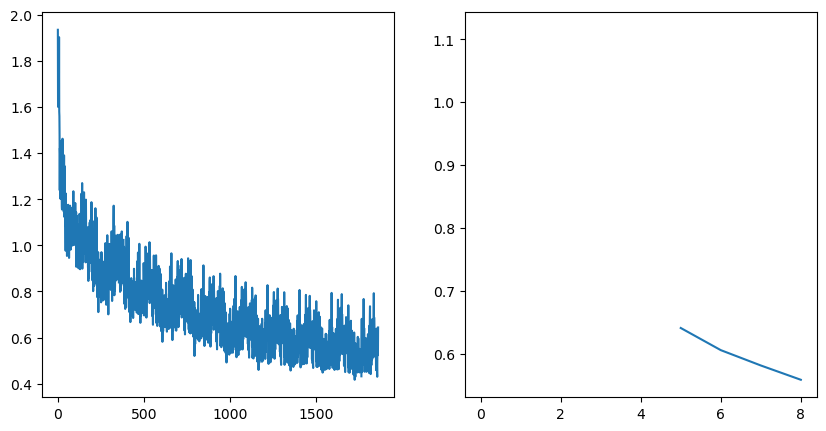

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(step_losses)
axes[1].plot(epoch_losses)
plt.show()

트레이닝된 모델을 `U-Net.pth` 파일로 저장한다.

In [ ]:
model_name = "U-Net.pth"
torch.save(model.state_dict(), model_name)

## **Predictions**

저장된 모델을 로드하여 테스트 데이터에 대한 prediction을 수행해보자. 아래에서 로드한 `U-Net-200.pth` [파일](https://drive.google.com/file/d/1IoiWY4P6CZopH-3f3GwrL-shY0ARIlyC/view?usp=sharing)은 GPU를 사용하는 서버에서 200 에포크 동안 트레이닝한 것이다. 

**주의:** Colab에서 이 파일을 정상적으로 로드하기 위해서는 `Edit->Notebook settings`에서 하드웨어 가속기를 GPU로 설정해야 한다.  

In [ ]:
# model_path = "U-Net.pth"
model_path = '/content/drive/MyDrive/DeepLearning2022/chap02_CNN/U-Net-200.pth'
model_ = UNet(num_classes=num_classes).to(device)
model_.load_state_dict(torch.load(model_path))

<All keys matched successfully>

테스트 데이터셋에서 하나의 배치만을 추출하여 prediction해보자.

In [ ]:
X, Y = next(iter(test_iter))
X, Y = X.to(device), Y.to(device)

Y_pred = model_(X)
print(Y_pred.shape)
Y_pred = torch.argmax(Y_pred, dim=1)
print(Y_pred.shape)

torch.Size([8, 21, 320, 480])
torch.Size([8, 320, 480])


In [ ]:
inverse_transform = transforms.Compose([
    transforms.Normalize((-0.485/0.229, -0.456/0.224, -0.406/0.225), (1/0.229, 1/0.224, 1/0.225))
])

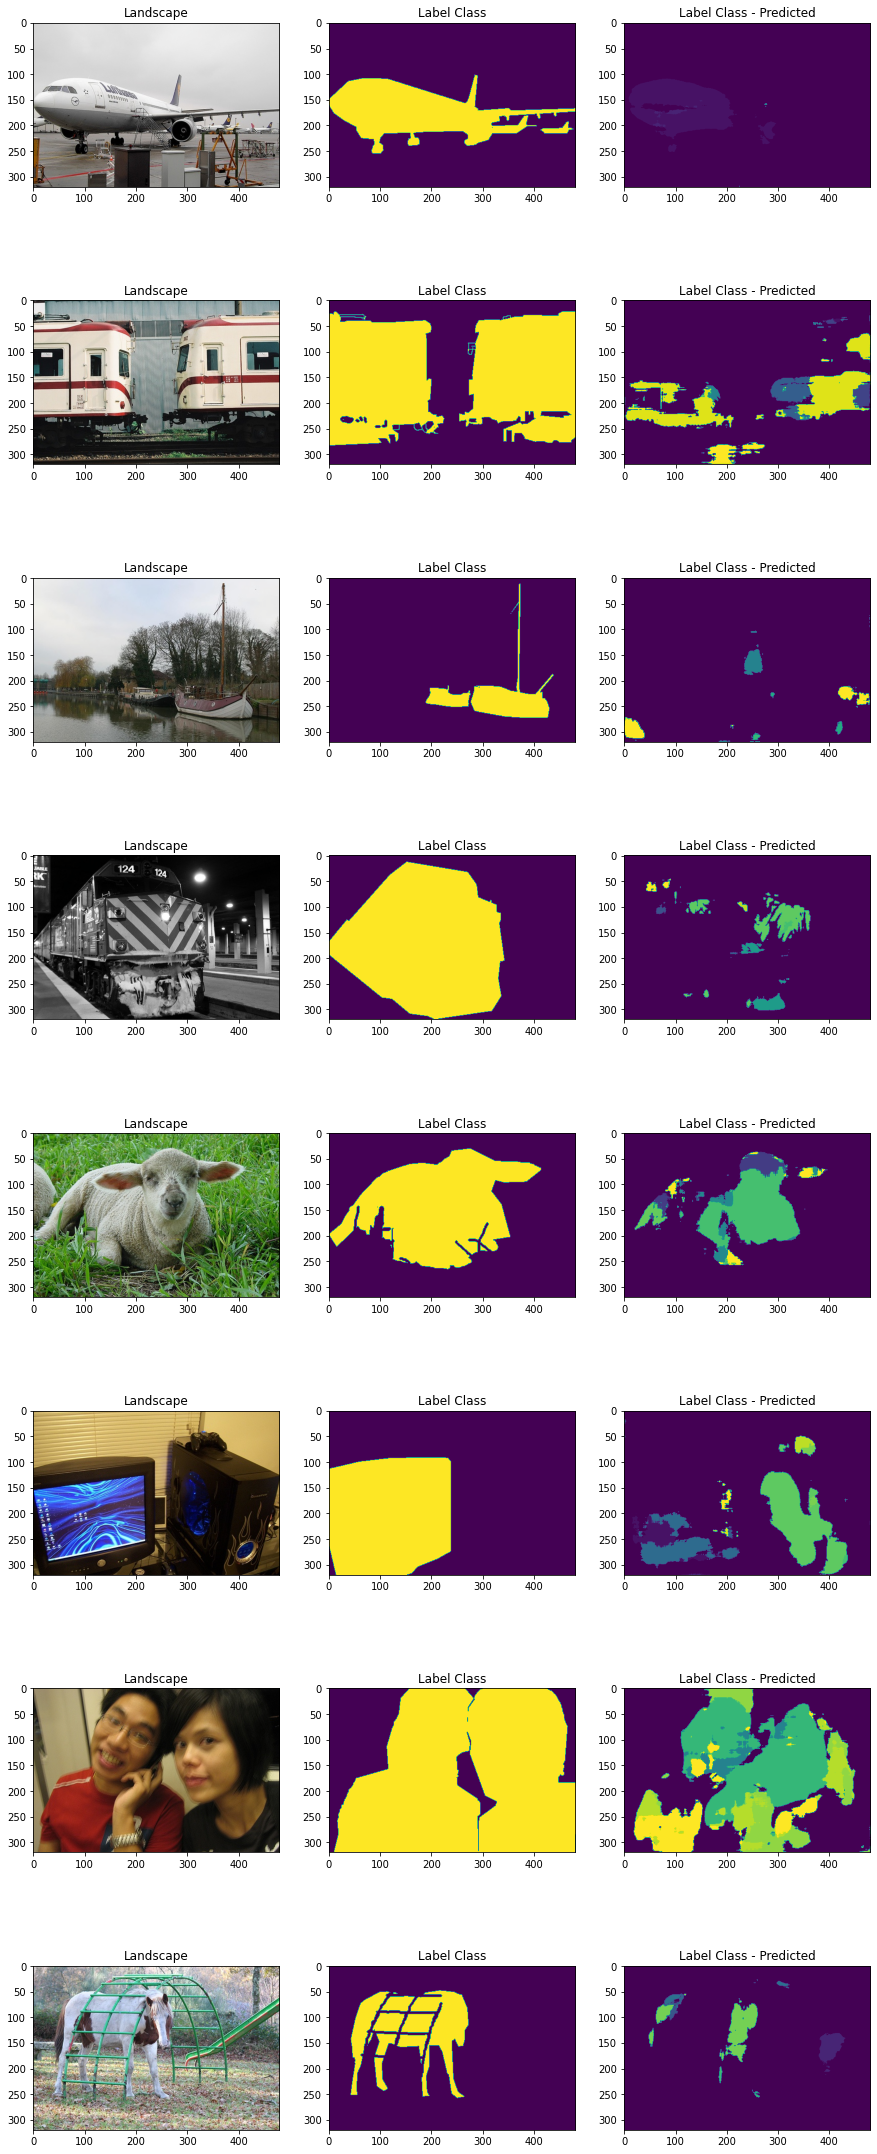

In [ ]:
fig, axes = plt.subplots(batch_size, 3, figsize=(3*5, batch_size*5))

for i in range(batch_size):
    
    landscape = inverse_transform(X[i]).permute(1, 2, 0).cpu().detach().numpy()
    label_class = Y[i].cpu().detach().numpy()
    label_class_predicted = Y_pred[i].cpu().detach().numpy()
    
    axes[i, 0].imshow(landscape)
    axes[i, 0].set_title("Landscape")
    axes[i, 1].imshow(label_class)
    axes[i, 1].set_title("Label Class")
    axes[i, 2].imshow(label_class_predicted)
    axes[i, 2].set_title("Label Class - Predicted")

## **관련 연구**



*   [Pyramid Scene Parsing Network (PSPNet)](https://arxiv.org/abs/1612.01105)
*   [Google DeepLab](https://arxiv.org/abs/1606.00915)
*   [ParseNet](https://arxiv.org/abs/1506.04579)

